In [102]:
from clustersim.core.simulator import Simulator

from clustersim.core.workload import Task, Job, UnifiedRandomWorkload
from clustersim.core.resources import Cpu, GpuSet, Mem, Node
import clustersim.core.scheduler

# Simulate workload with worst fit scheduling algorithm

In [103]:
sim = Simulator()

sim.add_node({'gpus': GpuSet([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for _ in range(4):
    dispatcher.add_workload('closed_random',
                            income_range=(0, 0), tasktime_range=(10, 100),
                            resources={'gpus': [0.4, 0.6]})
dispatcher.add_scheduler('basic', sim.nodes, scheme='worst_fit')

sim.run(until=2000)

Start generating work
Start generating work
Start generating work
Start generating work


In [104]:
import pandas as pd
import numpy as np

def moving_avg(series, window):
    if window <= 0:
        return series
    
    if len(series) < window:
        return pd.Series()
    
    new_series = pd.Series(dtype=np.float32)
    for i in range(len(series)-window+1):
        new_series.loc[i] = series.loc[i:i+window-1].mean()

    return new_series

In [105]:
node_stats = sim.nodes[0].records
display(node_stats.loc[:, ('gpu-util', 'task')].head(10))


,gpu-util,task
1.000000,0.25,1.0
3.000000,0.50,2.0
5.000000,0.75,3.0
12.001877,0.50,2.0
14.000000,0.75,3.0
68.101808,0.50,2.0
68.587324,0.25,1.0
70.000000,0.50,2.0
72.000000,0.75,3.0
75.241511,0.50,2.0


<AxesSubplot:title={'center':'gpu moving average 0.73'}>

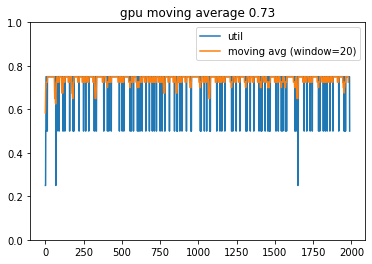

In [106]:
from matplotlib import pyplot as plt

node_ts = node_stats.loc[:,('gpu-util', 'task')] \
    .reindex(range(0, int(node_stats.index[-1])), method='pad')
avg = node_ts['gpu-util'].mean(axis='index')

gpu_util_ma = moving_avg(node_ts['gpu-util'], 10)

util = pd.DataFrame({'util': node_ts['gpu-util'], 'moving avg (window=20)': gpu_util_ma})
util.plot(title='gpu moving average %.2f' % avg, ylim=[0,1])

# Use random scheduler on the same workload

In [107]:
sim = Simulator()


sim.add_node({'gpus': GpuSet([1, 1, 1, 1])})
dispatcher = sim.add_dispatcher('random')

for _ in range(4):
    dispatcher.add_workload('closed_random',
                            income_range=(0, 0), tasktime_range=(10, 100),
                            resources={'gpus': [0.4, 0.6]})
dispatcher.add_scheduler('basic', sim.nodes, scheme='random')

sim.run(until=2000)

Start generating work
Start generating work
Start generating work
Start generating work


<AxesSubplot:title={'center':'gpu moving average 0.91'}>

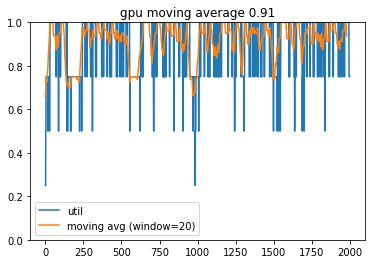

In [109]:
node_stats = sim.nodes[0].records
node_ts = node_stats.loc[:,('gpu-util', 'task')] \
    .reindex(range(0, int(node_stats.index[-1])), method='pad')

avg = node_ts['gpu-util'].mean(axis='index')
gpu_util_ma = moving_avg(node_ts['gpu-util'], 20)

util = pd.DataFrame({'util': node_ts['gpu-util'], 'moving avg (window=20)': gpu_util_ma})
util.plot(title='gpu moving average %.2f' % avg, ylim=[0,1])